In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,Dropout,BatchNormalization,ReLU
from tensorflow.keras.optimizers import Adam
from sklearn import svm
from sklearn.svm import SVC

In [2]:
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')

In [3]:
data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Veri önişleme


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [7]:
data.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [8]:
data.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

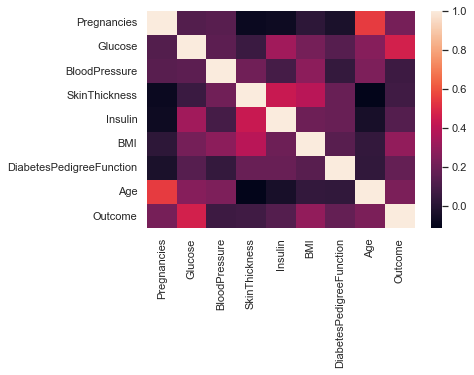

In [10]:
sns.heatmap(data.corr())

In [11]:
data.corr().nlargest(5,'Outcome').index

Index(['Outcome', 'Glucose', 'BMI', 'Age', 'Pregnancies'], dtype='object')

In [12]:
data=data[["Outcome","Glucose","BMI","Age","Pregnancies"]]

<AxesSubplot:xlabel='Glucose'>

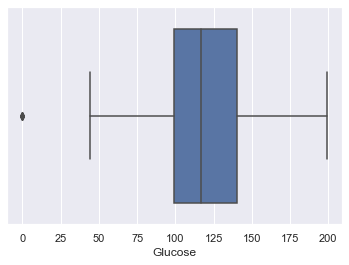

In [13]:
sns.boxplot(x=data['Glucose'])

In [14]:
data = data.drop(data.index[data['Glucose'] <= 10])


<AxesSubplot:xlabel='BMI'>

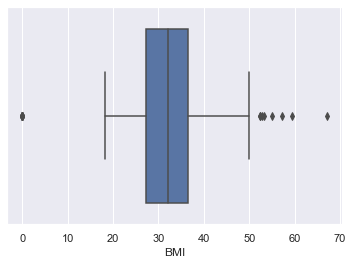

In [15]:
sns.boxplot(x=data['BMI'])

In [16]:
data = data.drop(data.index[data['Glucose'] <= 10])

## Veri setinin genişletilmesi

In [17]:
data = data.reset_index(drop=True)

In [18]:
X = data[['Glucose', 'BMI', 'Age','Pregnancies']]
y=data['Outcome']

In [19]:
X

,Glucose,BMI,Age,Pregnancies
0,148,33.6,50,6
1,85,26.6,31,1
2,183,23.3,32,8
3,89,28.1,21,1
4,137,43.1,33,0
...,...,...,...,...
758,101,32.9,63,10
759,122,36.8,27,2
760,121,26.2,30,5
761,126,30.1,47,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train= sm.fit_resample(X_train, y_train.ravel())

## MODEL hazırlıkları

In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [23]:
X_train

array([[ 1.94141574, -0.12056785, -1.059943  , -1.17672741],
       [-0.0645585 , -0.17329036, -0.8950736 , -0.31448821],
       [-0.16008108,  0.51210224, -0.64776949, -0.60190128],
       ...,
       [-1.11530691,  0.30049832,  1.57796744,  0.83516405],
       [-1.01978433,  0.44353508, -0.8126389 , -1.17672741],
       [ 2.10062004,  0.42203566,  0.50631633,  0.83516405]])

In [24]:
X_test

array([[-1.11530691e+00, -1.14865674e+00, -5.65334793e-01,
        -6.01901275e-01],
       [ 1.20907594e+00, -3.31457878e-01,  1.16579394e+00,
         1.40999018e+00],
       [ 2.19614263e+00,  6.04366626e-01,  1.82527155e+00,
         1.12257712e+00],
       [ 1.68668885e+00,  1.43044687e-01, -7.30204196e-01,
        -3.14488210e-01],
       [-7.01375718e-01, -2.78735371e-01,  1.76577520e-01,
         5.47750988e-01],
       [ 1.30459852e+00, -1.94220778e-03,  5.06316326e-01,
         2.60337922e-01],
       [-1.17898863e+00, -1.12229549e+00, -8.95073599e-01,
        -6.01901275e-01],
       [ 9.46458055e-02, -5.68709161e-01, -1.14237770e+00,
        -8.89314341e-01],
       [ 9.86189912e-01, -1.73290356e-01, -5.65334793e-01,
        -3.14488210e-01],
       [-8.92420884e-01,  4.85740984e-01, -1.14237770e+00,
        -6.01901275e-01],
       [-9.56102605e-01, -1.28046301e+00, -1.05994300e+00,
        -8.89314341e-01],
       [-5.74012274e-01, -1.01685047e+00, -9.77508300e-01,
      

## CNN 

In [25]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [26]:
print("X_train shape :",X_train.shape,"X_test shape", X_test.shape)

X_train shape : (690, 4, 1) X_test shape (229, 4, 1)


In [27]:
model=Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(4,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3, 64)             192       
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 64)             256       
_________________________________________________________________
dropout (Dropout)            (None, 3, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2, 128)            16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 128)            512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 128)            3

In [29]:
model.compile(optimizer=Adam(learning_rate=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(X_train,y_train,epochs=2478, validation_data=(X_test,y_test))

Epoch 1/2478
22/22 [==============================] - 0s 19ms/step - loss: 1.2185 - accuracy: 0.4841 - val_loss: 0.6844 - val_accuracy: 0.6943
Epoch 2/2478
22/22 [==============================] - 0s 8ms/step - loss: 1.1910 - accuracy: 0.4957 - val_loss: 0.6824 - val_accuracy: 0.7336
Epoch 3/2478
22/22 [==============================] - 0s 8ms/step - loss: 1.1639 - accuracy: 0.5304 - val_loss: 0.6819 - val_accuracy: 0.7205
Epoch 4/2478
22/22 [==============================] - 0s 8ms/step - loss: 1.0731 - accuracy: 0.5362 - val_loss: 0.6808 - val_accuracy: 0.6943
Epoch 5/2478
22/22 [==============================] - 0s 8ms/step - loss: 1.0480 - accuracy: 0.5304 - val_loss: 0.6790 - val_accuracy: 0.6812
Epoch 6/2478
22/22 [==============================] - 0s 8ms/step - loss: 1.0753 - accuracy: 0.5072 - val_loss: 0.6760 - val_accuracy: 0.6987
Epoch 7/2478
22/22 [==============================] - 0s 8ms/step - loss: 1.0189 - accuracy: 0.5406 - val_loss: 0.6722 - val_accuracy: 0.6900
Epoch

22/22 [==============================] - 0s 5ms/step - loss: 0.7024 - accuracy: 0.6522 - val_loss: 0.5472 - val_accuracy: 0.6943
Epoch 59/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.7561 - accuracy: 0.6406 - val_loss: 0.5470 - val_accuracy: 0.6943
Epoch 60/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.6733 - accuracy: 0.6536 - val_loss: 0.5465 - val_accuracy: 0.6943
Epoch 61/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.7122 - accuracy: 0.6768 - val_loss: 0.5455 - val_accuracy: 0.6943
Epoch 62/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.6754 - val_loss: 0.5452 - val_accuracy: 0.6943
Epoch 63/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.7442 - accuracy: 0.6551 - val_loss: 0.5457 - val_accuracy: 0.6900
Epoch 64/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.6495 - accuracy: 0.6725 - val_loss: 0.5454 - val_accuracy: 0.6943
Epoch 65/2478

22/22 [==============================] - 0s 5ms/step - loss: 0.6391 - accuracy: 0.6652 - val_loss: 0.5398 - val_accuracy: 0.7031
Epoch 116/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.6309 - accuracy: 0.7000 - val_loss: 0.5397 - val_accuracy: 0.7031
Epoch 117/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.6708 - accuracy: 0.6536 - val_loss: 0.5391 - val_accuracy: 0.7031
Epoch 118/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.6170 - accuracy: 0.6768 - val_loss: 0.5388 - val_accuracy: 0.7031
Epoch 119/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.6456 - accuracy: 0.6942 - val_loss: 0.5384 - val_accuracy: 0.7031
Epoch 120/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.6242 - accuracy: 0.6957 - val_loss: 0.5386 - val_accuracy: 0.7031
Epoch 121/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.6311 - accuracy: 0.7029 - val_loss: 0.5397 - val_accuracy: 0.7074
Epoch 1

Epoch 172/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5968 - accuracy: 0.7130 - val_loss: 0.5407 - val_accuracy: 0.7249
Epoch 173/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.7029 - val_loss: 0.5411 - val_accuracy: 0.7162
Epoch 174/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.5651 - accuracy: 0.7014 - val_loss: 0.5409 - val_accuracy: 0.7031
Epoch 175/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.6089 - accuracy: 0.6754 - val_loss: 0.5412 - val_accuracy: 0.7074
Epoch 176/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5799 - accuracy: 0.7319 - val_loss: 0.5417 - val_accuracy: 0.7074
Epoch 177/2478
22/22 [==============================] - 0s 6ms/step - loss: 0.5807 - accuracy: 0.7058 - val_loss: 0.5416 - val_accuracy: 0.7074
Epoch 178/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.6884 - val_loss: 0.5413 - val_accuracy:

Epoch 229/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.5417 - accuracy: 0.7261 - val_loss: 0.5374 - val_accuracy: 0.7118
Epoch 230/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7174 - val_loss: 0.5380 - val_accuracy: 0.7118
Epoch 231/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.7377 - val_loss: 0.5377 - val_accuracy: 0.7074
Epoch 232/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5620 - accuracy: 0.7101 - val_loss: 0.5380 - val_accuracy: 0.7118
Epoch 233/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.6199 - accuracy: 0.7058 - val_loss: 0.5382 - val_accuracy: 0.7118
Epoch 234/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5224 - accuracy: 0.7449 - val_loss: 0.5383 - val_accuracy: 0.7074
Epoch 235/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5748 - accuracy: 0.7232 - val_loss: 0.5378 - val_accuracy:

Epoch 286/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5344 - accuracy: 0.7319 - val_loss: 0.5345 - val_accuracy: 0.7118
Epoch 287/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5444 - accuracy: 0.7232 - val_loss: 0.5345 - val_accuracy: 0.7074
Epoch 288/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5434 - accuracy: 0.7449 - val_loss: 0.5335 - val_accuracy: 0.7118
Epoch 289/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5207 - accuracy: 0.7101 - val_loss: 0.5333 - val_accuracy: 0.7162
Epoch 290/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5636 - accuracy: 0.7203 - val_loss: 0.5330 - val_accuracy: 0.7031
Epoch 291/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5461 - accuracy: 0.7217 - val_loss: 0.5327 - val_accuracy: 0.7031
Epoch 292/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5417 - accuracy: 0.7449 - val_loss: 0.5325 - val_accuracy:

Epoch 343/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.5233 - accuracy: 0.7493 - val_loss: 0.5294 - val_accuracy: 0.7162
Epoch 344/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5639 - accuracy: 0.7087 - val_loss: 0.5294 - val_accuracy: 0.7162
Epoch 345/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5386 - accuracy: 0.7261 - val_loss: 0.5294 - val_accuracy: 0.7162
Epoch 346/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.5389 - accuracy: 0.7174 - val_loss: 0.5290 - val_accuracy: 0.7162
Epoch 347/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5039 - accuracy: 0.7391 - val_loss: 0.5293 - val_accuracy: 0.7162
Epoch 348/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5192 - accuracy: 0.7609 - val_loss: 0.5291 - val_accuracy: 0.7162
Epoch 349/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.5256 - accuracy: 0.7536 - val_loss: 0.5293 - val_accuracy:

22/22 [==============================] - 0s 4ms/step - loss: 0.5323 - accuracy: 0.7072 - val_loss: 0.5263 - val_accuracy: 0.7205
Epoch 400/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4951 - accuracy: 0.7493 - val_loss: 0.5264 - val_accuracy: 0.7205
Epoch 401/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5368 - accuracy: 0.7493 - val_loss: 0.5261 - val_accuracy: 0.7205
Epoch 402/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5438 - accuracy: 0.7478 - val_loss: 0.5259 - val_accuracy: 0.7205
Epoch 403/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5223 - accuracy: 0.7594 - val_loss: 0.5256 - val_accuracy: 0.7205
Epoch 404/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5273 - accuracy: 0.7551 - val_loss: 0.5253 - val_accuracy: 0.7293
Epoch 405/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5145 - accuracy: 0.7435 - val_loss: 0.5254 - val_accuracy: 0.7249
Epoch 4

Epoch 456/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4935 - accuracy: 0.7449 - val_loss: 0.5258 - val_accuracy: 0.7249
Epoch 457/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5013 - accuracy: 0.7696 - val_loss: 0.5256 - val_accuracy: 0.7249
Epoch 458/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5122 - accuracy: 0.7594 - val_loss: 0.5255 - val_accuracy: 0.7249
Epoch 459/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4921 - accuracy: 0.7710 - val_loss: 0.5252 - val_accuracy: 0.7293
Epoch 460/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5303 - accuracy: 0.7333 - val_loss: 0.5251 - val_accuracy: 0.7293
Epoch 461/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4860 - accuracy: 0.7435 - val_loss: 0.5247 - val_accuracy: 0.7293
Epoch 462/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5462 - accuracy: 0.7261 - val_loss: 0.5244 - val_accuracy:

Epoch 513/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.7710 - val_loss: 0.5229 - val_accuracy: 0.7467
Epoch 514/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4877 - accuracy: 0.7667 - val_loss: 0.5225 - val_accuracy: 0.7511
Epoch 515/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4840 - accuracy: 0.7696 - val_loss: 0.5233 - val_accuracy: 0.7511
Epoch 516/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5021 - accuracy: 0.7478 - val_loss: 0.5231 - val_accuracy: 0.7511
Epoch 517/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5334 - accuracy: 0.7464 - val_loss: 0.5225 - val_accuracy: 0.7511
Epoch 518/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5145 - accuracy: 0.7478 - val_loss: 0.5230 - val_accuracy: 0.7511
Epoch 519/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5202 - accuracy: 0.7551 - val_loss: 0.5231 - val_accuracy:

Epoch 570/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4798 - accuracy: 0.7768 - val_loss: 0.5232 - val_accuracy: 0.7467
Epoch 571/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5069 - accuracy: 0.7667 - val_loss: 0.5236 - val_accuracy: 0.7467
Epoch 572/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4790 - accuracy: 0.7681 - val_loss: 0.5235 - val_accuracy: 0.7424
Epoch 573/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5129 - accuracy: 0.7391 - val_loss: 0.5237 - val_accuracy: 0.7380
Epoch 574/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4915 - accuracy: 0.7522 - val_loss: 0.5232 - val_accuracy: 0.7336
Epoch 575/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4775 - accuracy: 0.7493 - val_loss: 0.5229 - val_accuracy: 0.7336
Epoch 576/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4977 - accuracy: 0.7623 - val_loss: 0.5226 - val_accuracy:

22/22 [==============================] - 0s 5ms/step - loss: 0.4721 - accuracy: 0.7652 - val_loss: 0.5210 - val_accuracy: 0.7380
Epoch 627/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4930 - accuracy: 0.7681 - val_loss: 0.5202 - val_accuracy: 0.7424
Epoch 628/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4721 - accuracy: 0.7754 - val_loss: 0.5202 - val_accuracy: 0.7467
Epoch 629/2478
22/22 [==============================] - ETA: 0s - loss: 0.4942 - accuracy: 0.76 - 0s 5ms/step - loss: 0.4763 - accuracy: 0.7783 - val_loss: 0.5200 - val_accuracy: 0.7467
Epoch 630/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5024 - accuracy: 0.7638 - val_loss: 0.5196 - val_accuracy: 0.7424
Epoch 631/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4655 - accuracy: 0.7638 - val_loss: 0.5194 - val_accuracy: 0.7424
Epoch 632/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4780 - accuracy: 0.7826 - val_l

Epoch 683/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.5177 - accuracy: 0.7565 - val_loss: 0.5210 - val_accuracy: 0.7555
Epoch 684/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4542 - accuracy: 0.7841 - val_loss: 0.5210 - val_accuracy: 0.7555
Epoch 685/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4893 - accuracy: 0.7667 - val_loss: 0.5216 - val_accuracy: 0.7598
Epoch 686/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4758 - accuracy: 0.7768 - val_loss: 0.5219 - val_accuracy: 0.7642
Epoch 687/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4801 - accuracy: 0.7797 - val_loss: 0.5219 - val_accuracy: 0.7642
Epoch 688/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4895 - accuracy: 0.7449 - val_loss: 0.5217 - val_accuracy: 0.7642
Epoch 689/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4952 - accuracy: 0.7507 - val_loss: 0.5221 - val_accuracy:

Epoch 740/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4832 - accuracy: 0.7681 - val_loss: 0.5174 - val_accuracy: 0.7729
Epoch 741/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4934 - accuracy: 0.7536 - val_loss: 0.5173 - val_accuracy: 0.7729
Epoch 742/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4720 - accuracy: 0.7739 - val_loss: 0.5173 - val_accuracy: 0.7686
Epoch 743/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4531 - accuracy: 0.8043 - val_loss: 0.5171 - val_accuracy: 0.7686
Epoch 744/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4932 - accuracy: 0.7754 - val_loss: 0.5174 - val_accuracy: 0.7729
Epoch 745/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.7681 - val_loss: 0.5176 - val_accuracy: 0.7773
Epoch 746/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4726 - accuracy: 0.7754 - val_loss: 0.5175 - val_accuracy:

Epoch 797/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4619 - accuracy: 0.7841 - val_loss: 0.5127 - val_accuracy: 0.7773
Epoch 798/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4433 - accuracy: 0.7957 - val_loss: 0.5129 - val_accuracy: 0.7773
Epoch 799/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4808 - accuracy: 0.7768 - val_loss: 0.5125 - val_accuracy: 0.7773
Epoch 800/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4612 - accuracy: 0.7768 - val_loss: 0.5126 - val_accuracy: 0.7729
Epoch 801/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4764 - accuracy: 0.7652 - val_loss: 0.5120 - val_accuracy: 0.7773
Epoch 802/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4637 - accuracy: 0.7841 - val_loss: 0.5115 - val_accuracy: 0.7773
Epoch 803/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4689 - accuracy: 0.7710 - val_loss: 0.5116 - val_accuracy:

Epoch 854/2478
22/22 [==============================] - 0s 6ms/step - loss: 0.4586 - accuracy: 0.8087 - val_loss: 0.5122 - val_accuracy: 0.7729
Epoch 855/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4798 - accuracy: 0.7884 - val_loss: 0.5124 - val_accuracy: 0.7729
Epoch 856/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4773 - accuracy: 0.7725 - val_loss: 0.5123 - val_accuracy: 0.7729
Epoch 857/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4675 - accuracy: 0.7667 - val_loss: 0.5121 - val_accuracy: 0.7729
Epoch 858/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4737 - accuracy: 0.7783 - val_loss: 0.5119 - val_accuracy: 0.7729
Epoch 859/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4803 - accuracy: 0.7754 - val_loss: 0.5121 - val_accuracy: 0.7729
Epoch 860/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4662 - accuracy: 0.7884 - val_loss: 0.5127 - val_accuracy:

Epoch 911/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4788 - accuracy: 0.7652 - val_loss: 0.5094 - val_accuracy: 0.7686
Epoch 912/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4617 - accuracy: 0.7783 - val_loss: 0.5097 - val_accuracy: 0.7686
Epoch 913/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4541 - accuracy: 0.7913 - val_loss: 0.5100 - val_accuracy: 0.7686
Epoch 914/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4768 - accuracy: 0.7826 - val_loss: 0.5101 - val_accuracy: 0.7686
Epoch 915/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4722 - accuracy: 0.7928 - val_loss: 0.5104 - val_accuracy: 0.7686
Epoch 916/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4820 - accuracy: 0.7652 - val_loss: 0.5111 - val_accuracy: 0.7686
Epoch 917/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4572 - accuracy: 0.7957 - val_loss: 0.5110 - val_accuracy:

Epoch 968/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4713 - accuracy: 0.7768 - val_loss: 0.5110 - val_accuracy: 0.7686
Epoch 969/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4722 - accuracy: 0.7928 - val_loss: 0.5108 - val_accuracy: 0.7686
Epoch 970/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.7739 - val_loss: 0.5107 - val_accuracy: 0.7686
Epoch 971/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4656 - accuracy: 0.7884 - val_loss: 0.5105 - val_accuracy: 0.7686
Epoch 972/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4624 - accuracy: 0.7754 - val_loss: 0.5101 - val_accuracy: 0.7686
Epoch 973/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4608 - accuracy: 0.7681 - val_loss: 0.5104 - val_accuracy: 0.7686
Epoch 974/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4468 - accuracy: 0.7928 - val_loss: 0.5105 - val_accuracy:

Epoch 1025/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4500 - accuracy: 0.7942 - val_loss: 0.5111 - val_accuracy: 0.7686
Epoch 1026/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4815 - accuracy: 0.7797 - val_loss: 0.5113 - val_accuracy: 0.7686
Epoch 1027/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4789 - accuracy: 0.7913 - val_loss: 0.5112 - val_accuracy: 0.7642
Epoch 1028/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4519 - accuracy: 0.7971 - val_loss: 0.5105 - val_accuracy: 0.7642
Epoch 1029/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.7652 - val_loss: 0.5105 - val_accuracy: 0.7686
Epoch 1030/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4591 - accuracy: 0.8014 - val_loss: 0.5099 - val_accuracy: 0.7686
Epoch 1031/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4581 - accuracy: 0.7942 - val_loss: 0.5091 - val_ac

22/22 [==============================] - 0s 5ms/step - loss: 0.4539 - accuracy: 0.7870 - val_loss: 0.5080 - val_accuracy: 0.7686
Epoch 1082/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4637 - accuracy: 0.7884 - val_loss: 0.5070 - val_accuracy: 0.7642
Epoch 1083/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4597 - accuracy: 0.7942 - val_loss: 0.5076 - val_accuracy: 0.7642
Epoch 1084/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4638 - accuracy: 0.7826 - val_loss: 0.5073 - val_accuracy: 0.7686
Epoch 1085/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4707 - accuracy: 0.7710 - val_loss: 0.5069 - val_accuracy: 0.7686
Epoch 1086/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4535 - accuracy: 0.8101 - val_loss: 0.5062 - val_accuracy: 0.7686
Epoch 1087/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4456 - accuracy: 0.8087 - val_loss: 0.5065 - val_accuracy: 0.7686
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4362 - accuracy: 0.7971 - val_loss: 0.5075 - val_accuracy: 0.7642
Epoch 1138/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4503 - accuracy: 0.7870 - val_loss: 0.5077 - val_accuracy: 0.7642
Epoch 1139/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4271 - accuracy: 0.7812 - val_loss: 0.5079 - val_accuracy: 0.7642
Epoch 1140/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 0.7884 - val_loss: 0.5081 - val_accuracy: 0.7642
Epoch 1141/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4478 - accuracy: 0.7942 - val_loss: 0.5084 - val_accuracy: 0.7642
Epoch 1142/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4386 - accuracy: 0.8000 - val_loss: 0.5083 - val_accuracy: 0.7642
Epoch 1143/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4726 - accuracy: 0.7899 - val_loss: 0.5073 - val_accuracy: 0.7642
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4625 - accuracy: 0.7725 - val_loss: 0.5091 - val_accuracy: 0.7686
Epoch 1194/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4656 - accuracy: 0.7899 - val_loss: 0.5094 - val_accuracy: 0.7729
Epoch 1195/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4658 - accuracy: 0.8000 - val_loss: 0.5099 - val_accuracy: 0.7642
Epoch 1196/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4508 - accuracy: 0.7899 - val_loss: 0.5094 - val_accuracy: 0.7642
Epoch 1197/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4621 - accuracy: 0.7986 - val_loss: 0.5088 - val_accuracy: 0.7729
Epoch 1198/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4715 - accuracy: 0.8087 - val_loss: 0.5083 - val_accuracy: 0.7729
Epoch 1199/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4511 - accuracy: 0.7942 - val_loss: 0.5075 - val_accuracy: 0.7729
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4399 - accuracy: 0.8159 - val_loss: 0.5098 - val_accuracy: 0.7642
Epoch 1250/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4372 - accuracy: 0.7855 - val_loss: 0.5102 - val_accuracy: 0.7686
Epoch 1251/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4588 - accuracy: 0.7739 - val_loss: 0.5097 - val_accuracy: 0.7686
Epoch 1252/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4347 - accuracy: 0.8058 - val_loss: 0.5092 - val_accuracy: 0.7686
Epoch 1253/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4481 - accuracy: 0.7899 - val_loss: 0.5094 - val_accuracy: 0.7686
Epoch 1254/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4382 - accuracy: 0.8043 - val_loss: 0.5097 - val_accuracy: 0.7686
Epoch 1255/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4706 - accuracy: 0.7841 - val_loss: 0.5099 - val_accuracy: 0.7686
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4567 - accuracy: 0.7841 - val_loss: 0.5099 - val_accuracy: 0.7642
Epoch 1306/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4381 - accuracy: 0.8145 - val_loss: 0.5102 - val_accuracy: 0.7642
Epoch 1307/2478
22/22 [==============================] - 0s 6ms/step - loss: 0.4574 - accuracy: 0.7841 - val_loss: 0.5098 - val_accuracy: 0.7642
Epoch 1308/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4507 - accuracy: 0.7971 - val_loss: 0.5091 - val_accuracy: 0.7642
Epoch 1309/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4678 - accuracy: 0.7783 - val_loss: 0.5087 - val_accuracy: 0.7642
Epoch 1310/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.7928 - val_loss: 0.5083 - val_accuracy: 0.7642
Epoch 1311/2478
22/22 [==============================] - 0s 6ms/step - loss: 0.4646 - accuracy: 0.7797 - val_loss: 0.5084 - val_accuracy: 0.7642
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4288 - accuracy: 0.7957 - val_loss: 0.5077 - val_accuracy: 0.7642
Epoch 1362/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 0.7725 - val_loss: 0.5078 - val_accuracy: 0.7642
Epoch 1363/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4499 - accuracy: 0.7855 - val_loss: 0.5073 - val_accuracy: 0.7642
Epoch 1364/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4461 - accuracy: 0.7957 - val_loss: 0.5072 - val_accuracy: 0.7642
Epoch 1365/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.7986 - val_loss: 0.5077 - val_accuracy: 0.7642
Epoch 1366/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4225 - accuracy: 0.8217 - val_loss: 0.5074 - val_accuracy: 0.7642
Epoch 1367/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4384 - accuracy: 0.7942 - val_loss: 0.5074 - val_accuracy: 0.7686
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4404 - accuracy: 0.7986 - val_loss: 0.5042 - val_accuracy: 0.7686
Epoch 1418/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4462 - accuracy: 0.7913 - val_loss: 0.5042 - val_accuracy: 0.7686
Epoch 1419/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4623 - accuracy: 0.7928 - val_loss: 0.5042 - val_accuracy: 0.7686
Epoch 1420/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4436 - accuracy: 0.7913 - val_loss: 0.5045 - val_accuracy: 0.7642
Epoch 1421/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4498 - accuracy: 0.7928 - val_loss: 0.5050 - val_accuracy: 0.7642
Epoch 1422/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4401 - accuracy: 0.8014 - val_loss: 0.5045 - val_accuracy: 0.7642
Epoch 1423/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4282 - accuracy: 0.8159 - val_loss: 0.5048 - val_accuracy: 0.7642
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4493 - accuracy: 0.7928 - val_loss: 0.5059 - val_accuracy: 0.7686
Epoch 1474/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4520 - accuracy: 0.7986 - val_loss: 0.5060 - val_accuracy: 0.7642
Epoch 1475/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4420 - accuracy: 0.7986 - val_loss: 0.5062 - val_accuracy: 0.7642
Epoch 1476/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4454 - accuracy: 0.8029 - val_loss: 0.5060 - val_accuracy: 0.7642
Epoch 1477/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4349 - accuracy: 0.7957 - val_loss: 0.5066 - val_accuracy: 0.7686
Epoch 1478/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4426 - accuracy: 0.7971 - val_loss: 0.5065 - val_accuracy: 0.7642
Epoch 1479/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4366 - accuracy: 0.8000 - val_loss: 0.5056 - val_accuracy: 0.7642
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4428 - accuracy: 0.8174 - val_loss: 0.5067 - val_accuracy: 0.7729
Epoch 1530/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4391 - accuracy: 0.7710 - val_loss: 0.5068 - val_accuracy: 0.7729
Epoch 1531/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4297 - accuracy: 0.7957 - val_loss: 0.5070 - val_accuracy: 0.7686
Epoch 1532/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4399 - accuracy: 0.8029 - val_loss: 0.5088 - val_accuracy: 0.7686
Epoch 1533/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4257 - accuracy: 0.8159 - val_loss: 0.5092 - val_accuracy: 0.7686
Epoch 1534/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4457 - accuracy: 0.8058 - val_loss: 0.5093 - val_accuracy: 0.7686
Epoch 1535/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4345 - accuracy: 0.8116 - val_loss: 0.5101 - val_accuracy: 0.7686
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4389 - accuracy: 0.8232 - val_loss: 0.5114 - val_accuracy: 0.7729
Epoch 1586/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4188 - accuracy: 0.8072 - val_loss: 0.5114 - val_accuracy: 0.7729
Epoch 1587/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4244 - accuracy: 0.7942 - val_loss: 0.5111 - val_accuracy: 0.7729
Epoch 1588/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4337 - accuracy: 0.8000 - val_loss: 0.5110 - val_accuracy: 0.7729
Epoch 1589/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4411 - accuracy: 0.7971 - val_loss: 0.5118 - val_accuracy: 0.7729
Epoch 1590/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4338 - accuracy: 0.8130 - val_loss: 0.5112 - val_accuracy: 0.7729
Epoch 1591/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4257 - accuracy: 0.8174 - val_loss: 0.5108 - val_accuracy: 0.7729
E

22/22 [==============================] - 0s 4ms/step - loss: 0.4310 - accuracy: 0.7899 - val_loss: 0.5151 - val_accuracy: 0.7729
Epoch 1642/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4270 - accuracy: 0.8014 - val_loss: 0.5152 - val_accuracy: 0.7729
Epoch 1643/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4297 - accuracy: 0.8029 - val_loss: 0.5147 - val_accuracy: 0.7729
Epoch 1644/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4110 - accuracy: 0.7942 - val_loss: 0.5144 - val_accuracy: 0.7729
Epoch 1645/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4203 - accuracy: 0.8145 - val_loss: 0.5140 - val_accuracy: 0.7729
Epoch 1646/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4240 - accuracy: 0.7986 - val_loss: 0.5141 - val_accuracy: 0.7729
Epoch 1647/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4196 - accuracy: 0.8014 - val_loss: 0.5151 - val_accuracy: 0.7729
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4248 - accuracy: 0.8319 - val_loss: 0.5112 - val_accuracy: 0.7817
Epoch 1698/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4638 - accuracy: 0.7957 - val_loss: 0.5115 - val_accuracy: 0.7817
Epoch 1699/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4443 - accuracy: 0.8058 - val_loss: 0.5111 - val_accuracy: 0.7773
Epoch 1700/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4139 - accuracy: 0.7928 - val_loss: 0.5120 - val_accuracy: 0.7773
Epoch 1701/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4171 - accuracy: 0.8087 - val_loss: 0.5122 - val_accuracy: 0.7773
Epoch 1702/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4331 - accuracy: 0.8029 - val_loss: 0.5118 - val_accuracy: 0.7817
Epoch 1703/2478
22/22 [==============================] - 0s 6ms/step - loss: 0.4196 - accuracy: 0.8043 - val_loss: 0.5111 - val_accuracy: 0.7817
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4486 - accuracy: 0.7971 - val_loss: 0.5144 - val_accuracy: 0.7773
Epoch 1754/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4440 - accuracy: 0.7942 - val_loss: 0.5140 - val_accuracy: 0.7817
Epoch 1755/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4186 - accuracy: 0.8174 - val_loss: 0.5143 - val_accuracy: 0.7773
Epoch 1756/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4168 - accuracy: 0.8232 - val_loss: 0.5149 - val_accuracy: 0.7773
Epoch 1757/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4263 - accuracy: 0.8101 - val_loss: 0.5150 - val_accuracy: 0.7773
Epoch 1758/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4236 - accuracy: 0.8029 - val_loss: 0.5142 - val_accuracy: 0.7817
Epoch 1759/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4160 - accuracy: 0.8159 - val_loss: 0.5135 - val_accuracy: 0.7817
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4367 - accuracy: 0.8043 - val_loss: 0.5142 - val_accuracy: 0.7773
Epoch 1810/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4291 - accuracy: 0.8130 - val_loss: 0.5145 - val_accuracy: 0.7773
Epoch 1811/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4281 - accuracy: 0.8043 - val_loss: 0.5146 - val_accuracy: 0.7773
Epoch 1812/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4221 - accuracy: 0.8000 - val_loss: 0.5158 - val_accuracy: 0.7729
Epoch 1813/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4036 - accuracy: 0.8232 - val_loss: 0.5153 - val_accuracy: 0.7773
Epoch 1814/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4218 - accuracy: 0.8174 - val_loss: 0.5149 - val_accuracy: 0.7773
Epoch 1815/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4114 - accuracy: 0.8174 - val_loss: 0.5149 - val_accuracy: 0.7729
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4017 - accuracy: 0.8101 - val_loss: 0.5162 - val_accuracy: 0.7729
Epoch 1866/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4194 - accuracy: 0.7957 - val_loss: 0.5163 - val_accuracy: 0.7729
Epoch 1867/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4289 - accuracy: 0.8145 - val_loss: 0.5172 - val_accuracy: 0.7729
Epoch 1868/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4048 - accuracy: 0.8174 - val_loss: 0.5171 - val_accuracy: 0.7729
Epoch 1869/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4079 - accuracy: 0.8203 - val_loss: 0.5179 - val_accuracy: 0.7729
Epoch 1870/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4194 - accuracy: 0.8145 - val_loss: 0.5176 - val_accuracy: 0.7729
Epoch 1871/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4323 - accuracy: 0.7957 - val_loss: 0.5176 - val_accuracy: 0.7729
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4241 - accuracy: 0.8043 - val_loss: 0.5154 - val_accuracy: 0.7773
Epoch 1922/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4173 - accuracy: 0.8116 - val_loss: 0.5160 - val_accuracy: 0.7773
Epoch 1923/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4409 - accuracy: 0.7986 - val_loss: 0.5167 - val_accuracy: 0.7773
Epoch 1924/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.3977 - accuracy: 0.8058 - val_loss: 0.5175 - val_accuracy: 0.7773
Epoch 1925/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4133 - accuracy: 0.8174 - val_loss: 0.5181 - val_accuracy: 0.7773
Epoch 1926/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4374 - accuracy: 0.8043 - val_loss: 0.5173 - val_accuracy: 0.7773
Epoch 1927/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4204 - accuracy: 0.8101 - val_loss: 0.5180 - val_accuracy: 0.7773
E

22/22 [==============================] - 0s 5ms/step - loss: 0.3911 - accuracy: 0.8348 - val_loss: 0.5222 - val_accuracy: 0.7729
Epoch 1978/2478
22/22 [==============================] - 0s 6ms/step - loss: 0.4071 - accuracy: 0.8246 - val_loss: 0.5212 - val_accuracy: 0.7773
Epoch 1979/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4242 - accuracy: 0.8159 - val_loss: 0.5214 - val_accuracy: 0.7686
Epoch 1980/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4145 - accuracy: 0.8188 - val_loss: 0.5217 - val_accuracy: 0.7729
Epoch 1981/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4591 - accuracy: 0.7884 - val_loss: 0.5215 - val_accuracy: 0.7729
Epoch 1982/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4074 - accuracy: 0.8261 - val_loss: 0.5221 - val_accuracy: 0.7686
Epoch 1983/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.3976 - accuracy: 0.8304 - val_loss: 0.5226 - val_accuracy: 0.7686
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8174 - val_loss: 0.5247 - val_accuracy: 0.7686
Epoch 2034/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.3991 - accuracy: 0.8145 - val_loss: 0.5262 - val_accuracy: 0.7686
Epoch 2035/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4193 - accuracy: 0.7971 - val_loss: 0.5260 - val_accuracy: 0.7686
Epoch 2036/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4021 - accuracy: 0.8130 - val_loss: 0.5257 - val_accuracy: 0.7686
Epoch 2037/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4220 - accuracy: 0.8130 - val_loss: 0.5255 - val_accuracy: 0.7686
Epoch 2038/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4226 - accuracy: 0.8029 - val_loss: 0.5258 - val_accuracy: 0.7729
Epoch 2039/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4141 - accuracy: 0.8159 - val_loss: 0.5248 - val_accuracy: 0.7729
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4035 - accuracy: 0.8217 - val_loss: 0.5241 - val_accuracy: 0.7686
Epoch 2090/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4083 - accuracy: 0.8203 - val_loss: 0.5234 - val_accuracy: 0.7729
Epoch 2091/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4549 - accuracy: 0.7855 - val_loss: 0.5233 - val_accuracy: 0.7686
Epoch 2092/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4124 - accuracy: 0.8130 - val_loss: 0.5219 - val_accuracy: 0.7686
Epoch 2093/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4100 - accuracy: 0.8159 - val_loss: 0.5216 - val_accuracy: 0.7686
Epoch 2094/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4381 - accuracy: 0.8058 - val_loss: 0.5205 - val_accuracy: 0.7686
Epoch 2095/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4154 - accuracy: 0.8101 - val_loss: 0.5189 - val_accuracy: 0.7686
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4120 - accuracy: 0.8101 - val_loss: 0.5233 - val_accuracy: 0.7729
Epoch 2146/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.7942 - val_loss: 0.5231 - val_accuracy: 0.7773
Epoch 2147/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.3933 - accuracy: 0.8232 - val_loss: 0.5227 - val_accuracy: 0.7686
Epoch 2148/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4282 - accuracy: 0.7971 - val_loss: 0.5236 - val_accuracy: 0.7773
Epoch 2149/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4039 - accuracy: 0.8261 - val_loss: 0.5240 - val_accuracy: 0.7773
Epoch 2150/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4120 - accuracy: 0.8058 - val_loss: 0.5238 - val_accuracy: 0.7729
Epoch 2151/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4097 - accuracy: 0.8000 - val_loss: 0.5235 - val_accuracy: 0.7729
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4086 - accuracy: 0.8159 - val_loss: 0.5255 - val_accuracy: 0.7729
Epoch 2202/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4271 - accuracy: 0.7971 - val_loss: 0.5256 - val_accuracy: 0.7729
Epoch 2203/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4206 - accuracy: 0.7957 - val_loss: 0.5257 - val_accuracy: 0.7773
Epoch 2204/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4060 - accuracy: 0.8203 - val_loss: 0.5266 - val_accuracy: 0.7773
Epoch 2205/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.3984 - accuracy: 0.8072 - val_loss: 0.5268 - val_accuracy: 0.7729
Epoch 2206/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4132 - accuracy: 0.8246 - val_loss: 0.5267 - val_accuracy: 0.7773
Epoch 2207/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4070 - accuracy: 0.8203 - val_loss: 0.5271 - val_accuracy: 0.7773
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4067 - accuracy: 0.8145 - val_loss: 0.5311 - val_accuracy: 0.7686
Epoch 2258/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4147 - accuracy: 0.8217 - val_loss: 0.5311 - val_accuracy: 0.7686
Epoch 2259/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4147 - accuracy: 0.8203 - val_loss: 0.5317 - val_accuracy: 0.7729
Epoch 2260/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.3941 - accuracy: 0.8348 - val_loss: 0.5316 - val_accuracy: 0.7729
Epoch 2261/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4144 - accuracy: 0.8116 - val_loss: 0.5321 - val_accuracy: 0.7686
Epoch 2262/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4077 - accuracy: 0.8232 - val_loss: 0.5318 - val_accuracy: 0.7729
Epoch 2263/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.8333 - val_loss: 0.5317 - val_accuracy: 0.7729
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4144 - accuracy: 0.8188 - val_loss: 0.5328 - val_accuracy: 0.7686
Epoch 2314/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4047 - accuracy: 0.8014 - val_loss: 0.5331 - val_accuracy: 0.7686
Epoch 2315/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4071 - accuracy: 0.8275 - val_loss: 0.5311 - val_accuracy: 0.7686
Epoch 2316/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4126 - accuracy: 0.8203 - val_loss: 0.5320 - val_accuracy: 0.7686
Epoch 2317/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.3984 - accuracy: 0.8203 - val_loss: 0.5325 - val_accuracy: 0.7686
Epoch 2318/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4075 - accuracy: 0.8232 - val_loss: 0.5328 - val_accuracy: 0.7686
Epoch 2319/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4000 - accuracy: 0.8159 - val_loss: 0.5321 - val_accuracy: 0.7686
E

22/22 [==============================] - 0s 5ms/step - loss: 0.4100 - accuracy: 0.8043 - val_loss: 0.5362 - val_accuracy: 0.7729
Epoch 2370/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.3899 - accuracy: 0.8290 - val_loss: 0.5360 - val_accuracy: 0.7729
Epoch 2371/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.3868 - accuracy: 0.8246 - val_loss: 0.5362 - val_accuracy: 0.7729
Epoch 2372/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.3936 - accuracy: 0.8290 - val_loss: 0.5360 - val_accuracy: 0.7686
Epoch 2373/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.3987 - accuracy: 0.8232 - val_loss: 0.5365 - val_accuracy: 0.7686
Epoch 2374/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.3943 - accuracy: 0.8275 - val_loss: 0.5350 - val_accuracy: 0.7686
Epoch 2375/2478
22/22 [==============================] - 0s 5ms/step - loss: 0.4102 - accuracy: 0.8043 - val_loss: 0.5360 - val_accuracy: 0.7686
E

22/22 [==============================] - 0s 4ms/step - loss: 0.3748 - accuracy: 0.8333 - val_loss: 0.5449 - val_accuracy: 0.7686
Epoch 2426/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.3876 - accuracy: 0.8319 - val_loss: 0.5459 - val_accuracy: 0.7729
Epoch 2427/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4075 - accuracy: 0.8217 - val_loss: 0.5466 - val_accuracy: 0.7729
Epoch 2428/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.3868 - accuracy: 0.8232 - val_loss: 0.5467 - val_accuracy: 0.7729
Epoch 2429/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4446 - accuracy: 0.8072 - val_loss: 0.5459 - val_accuracy: 0.7729
Epoch 2430/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.3753 - accuracy: 0.8507 - val_loss: 0.5454 - val_accuracy: 0.7729
Epoch 2431/2478
22/22 [==============================] - 0s 4ms/step - loss: 0.4043 - accuracy: 0.8174 - val_loss: 0.5449 - val_accuracy: 0.7729
E

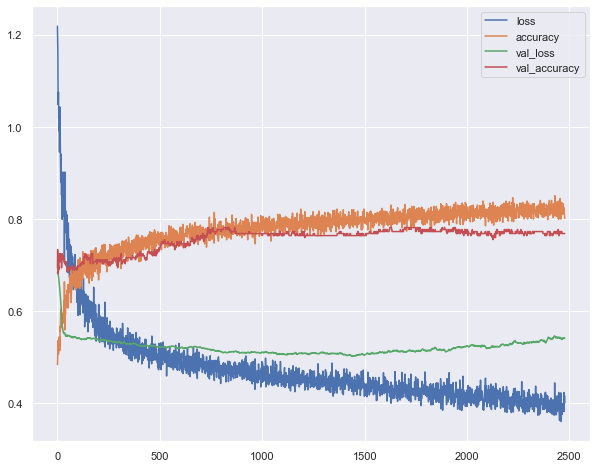

In [31]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.show()

In [32]:
history.history["accuracy"][len(history.history["accuracy"])-1:]

[0.8014492988586426]

In [33]:
loss, acc_gender = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc_gender))

Test loss: 0.5414496064186096
Test Accuracy: 0.7685589790344238


In [34]:
loss, acc_gender = model.evaluate(X_train,y_train,verbose=0)
print('Train loss: {}'.format(loss))
print('Train Accuracy: {}'.format(acc_gender))

Train loss: 0.33308276534080505
Train Accuracy: 0.8637681007385254


In [35]:
y_pred = model.predict(X_test)
Actual = np.round(y_test[:])
Predicted = np.round(y_pred[:])

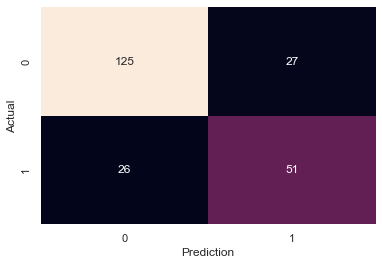

In [36]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Actual,Predicted),annot=True,cbar=False,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Actual");

## ANN MODEL


In [37]:
model = Sequential()

model.add(Dense(128, input_shape = (4, 1)))
model.add(ReLU())
model.add(Dropout(0.1))

model.add(Dense(64))
model.add(ReLU())
model.add(Dropout(0.1))

model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

history = model.fit(X_train,y_train,epochs = 1000, batch_size = 250,validation_data = (X_test,y_test))

Epoch 1/1000
3/3 [==============================] - 0s 74ms/step - loss: 0.6870 - accuracy: 0.5605 - val_loss: 0.6669 - val_accuracy: 0.6354
Epoch 2/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6674 - accuracy: 0.6504 - val_loss: 0.6535 - val_accuracy: 0.6354
Epoch 3/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6534 - accuracy: 0.6543 - val_loss: 0.6426 - val_accuracy: 0.6354
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6430 - accuracy: 0.6540 - val_loss: 0.6349 - val_accuracy: 0.6354
Epoch 5/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6365 - accuracy: 0.6540 - val_loss: 0.6311 - val_accuracy: 0.6354
Epoch 6/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6299 - accuracy: 0.6551 - val_loss: 0.6302 - val_accuracy: 0.6376
Epoch 7/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6291 - accuracy: 0.6551 - val_loss: 0.6321 - val_accuracy: 0.6365
Epoch 8/1000
3/3 [=

3/3 [==============================] - 0s 8ms/step - loss: 0.6253 - accuracy: 0.6623 - val_loss: 0.6428 - val_accuracy: 0.6190
Epoch 60/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6251 - accuracy: 0.6609 - val_loss: 0.6425 - val_accuracy: 0.6190
Epoch 61/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6237 - accuracy: 0.6616 - val_loss: 0.6422 - val_accuracy: 0.6190
Epoch 62/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6251 - accuracy: 0.6638 - val_loss: 0.6415 - val_accuracy: 0.6190
Epoch 63/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6257 - accuracy: 0.6630 - val_loss: 0.6417 - val_accuracy: 0.6190
Epoch 64/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6240 - accuracy: 0.6634 - val_loss: 0.6424 - val_accuracy: 0.6190
Epoch 65/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6241 - accuracy: 0.6638 - val_loss: 0.6422 - val_accuracy: 0.6190
Epoch 66/1000
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 0.6252 - accuracy: 0.6594 - val_loss: 0.6422 - val_accuracy: 0.6168
Epoch 118/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6245 - accuracy: 0.6627 - val_loss: 0.6433 - val_accuracy: 0.6168
Epoch 119/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6242 - accuracy: 0.6598 - val_loss: 0.6422 - val_accuracy: 0.6168
Epoch 120/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6245 - accuracy: 0.6616 - val_loss: 0.6432 - val_accuracy: 0.6168
Epoch 121/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6236 - accuracy: 0.6634 - val_loss: 0.6427 - val_accuracy: 0.6168
Epoch 122/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6230 - accuracy: 0.6609 - val_loss: 0.6419 - val_accuracy: 0.6168
Epoch 123/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6240 - accuracy: 0.6601 - val_loss: 0.6417 - val_accuracy: 0.6168
Epoch 124/1000
3/3 [=

Epoch 175/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6234 - accuracy: 0.6623 - val_loss: 0.6427 - val_accuracy: 0.6168
Epoch 176/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6240 - accuracy: 0.6627 - val_loss: 0.6436 - val_accuracy: 0.6168
Epoch 177/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6239 - accuracy: 0.6623 - val_loss: 0.6434 - val_accuracy: 0.6168
Epoch 178/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6234 - accuracy: 0.6634 - val_loss: 0.6436 - val_accuracy: 0.6168
Epoch 179/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6234 - accuracy: 0.6623 - val_loss: 0.6431 - val_accuracy: 0.6168
Epoch 180/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6242 - accuracy: 0.6616 - val_loss: 0.6428 - val_accuracy: 0.6168
Epoch 181/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6236 - accuracy: 0.6634 - val_loss: 0.6423 - val_accuracy: 0.6168
Epoch 

Epoch 233/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6243 - accuracy: 0.6630 - val_loss: 0.6400 - val_accuracy: 0.6168
Epoch 234/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6221 - accuracy: 0.6630 - val_loss: 0.6412 - val_accuracy: 0.6168
Epoch 235/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6239 - accuracy: 0.6601 - val_loss: 0.6431 - val_accuracy: 0.6168
Epoch 236/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6228 - accuracy: 0.6616 - val_loss: 0.6432 - val_accuracy: 0.6168
Epoch 237/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6230 - accuracy: 0.6598 - val_loss: 0.6423 - val_accuracy: 0.6168
Epoch 238/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6232 - accuracy: 0.6634 - val_loss: 0.6420 - val_accuracy: 0.6168
Epoch 239/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6232 - accuracy: 0.6645 - val_loss: 0.6406 - val_accuracy: 0.6168
Epoch 

Epoch 291/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6218 - accuracy: 0.6620 - val_loss: 0.6391 - val_accuracy: 0.6168
Epoch 292/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6227 - accuracy: 0.6627 - val_loss: 0.6393 - val_accuracy: 0.6168
Epoch 293/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6226 - accuracy: 0.6630 - val_loss: 0.6383 - val_accuracy: 0.6168
Epoch 294/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.6204 - accuracy: 0.6620 - val_loss: 0.6391 - val_accuracy: 0.6168
Epoch 295/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6234 - accuracy: 0.6623 - val_loss: 0.6399 - val_accuracy: 0.6168
Epoch 296/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6231 - accuracy: 0.6627 - val_loss: 0.6400 - val_accuracy: 0.6168
Epoch 297/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6218 - accuracy: 0.6609 - val_loss: 0.6416 - val_accuracy: 0.6168
Epoch

3/3 [==============================] - 0s 8ms/step - loss: 0.6222 - accuracy: 0.6638 - val_loss: 0.6402 - val_accuracy: 0.6168
Epoch 349/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6209 - accuracy: 0.6641 - val_loss: 0.6417 - val_accuracy: 0.6168
Epoch 350/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6222 - accuracy: 0.6583 - val_loss: 0.6395 - val_accuracy: 0.6168
Epoch 351/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6203 - accuracy: 0.6612 - val_loss: 0.6390 - val_accuracy: 0.6168
Epoch 352/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6224 - accuracy: 0.6612 - val_loss: 0.6373 - val_accuracy: 0.6168
Epoch 353/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6210 - accuracy: 0.6616 - val_loss: 0.6364 - val_accuracy: 0.6168
Epoch 354/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6218 - accuracy: 0.6645 - val_loss: 0.6380 - val_accuracy: 0.6168
Epoch 355/1000
3/3 [=

Epoch 406/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.6203 - accuracy: 0.6649 - val_loss: 0.6404 - val_accuracy: 0.6135
Epoch 407/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6212 - accuracy: 0.6605 - val_loss: 0.6397 - val_accuracy: 0.6168
Epoch 408/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.6219 - accuracy: 0.6630 - val_loss: 0.6384 - val_accuracy: 0.6168
Epoch 409/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6216 - accuracy: 0.6620 - val_loss: 0.6402 - val_accuracy: 0.6157
Epoch 410/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.6207 - accuracy: 0.6645 - val_loss: 0.6401 - val_accuracy: 0.6157
Epoch 411/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6225 - accuracy: 0.6601 - val_loss: 0.6387 - val_accuracy: 0.6157
Epoch 412/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6213 - accuracy: 0.6583 - val_loss: 0.6386 - val_accuracy: 0.6157
Ep

3/3 [==============================] - 0s 9ms/step - loss: 0.6219 - accuracy: 0.6616 - val_loss: 0.6362 - val_accuracy: 0.6168
Epoch 464/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6230 - accuracy: 0.6616 - val_loss: 0.6367 - val_accuracy: 0.6168
Epoch 465/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6209 - accuracy: 0.6616 - val_loss: 0.6370 - val_accuracy: 0.6168
Epoch 466/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6197 - accuracy: 0.6623 - val_loss: 0.6357 - val_accuracy: 0.6168
Epoch 467/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6221 - accuracy: 0.6612 - val_loss: 0.6352 - val_accuracy: 0.6168
Epoch 468/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6210 - accuracy: 0.6630 - val_loss: 0.6349 - val_accuracy: 0.6168
Epoch 469/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6222 - accuracy: 0.6649 - val_loss: 0.6356 - val_accuracy: 0.6168
Epoch 470/1000
3/3 [

Epoch 521/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6196 - accuracy: 0.6645 - val_loss: 0.6401 - val_accuracy: 0.6157
Epoch 522/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6221 - accuracy: 0.6652 - val_loss: 0.6389 - val_accuracy: 0.6157
Epoch 523/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6211 - accuracy: 0.6634 - val_loss: 0.6369 - val_accuracy: 0.6168
Epoch 524/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6204 - accuracy: 0.6605 - val_loss: 0.6370 - val_accuracy: 0.6157
Epoch 525/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6209 - accuracy: 0.6612 - val_loss: 0.6352 - val_accuracy: 0.6135
Epoch 526/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.6204 - accuracy: 0.6623 - val_loss: 0.6358 - val_accuracy: 0.6135
Epoch 527/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6197 - accuracy: 0.6638 - val_loss: 0.6357 - val_accuracy: 0.6168
Epoch 

3/3 [==============================] - 0s 9ms/step - loss: 0.6202 - accuracy: 0.6623 - val_loss: 0.6392 - val_accuracy: 0.6157
Epoch 579/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6192 - accuracy: 0.6627 - val_loss: 0.6372 - val_accuracy: 0.6157
Epoch 580/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6185 - accuracy: 0.6587 - val_loss: 0.6369 - val_accuracy: 0.6157
Epoch 581/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6200 - accuracy: 0.6612 - val_loss: 0.6356 - val_accuracy: 0.6157
Epoch 582/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6208 - accuracy: 0.6638 - val_loss: 0.6341 - val_accuracy: 0.6135
Epoch 583/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6194 - accuracy: 0.6587 - val_loss: 0.6350 - val_accuracy: 0.6168
Epoch 584/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6187 - accuracy: 0.6609 - val_loss: 0.6361 - val_accuracy: 0.6157
Epoch 585/1000
3/3 [=

Epoch 636/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6203 - accuracy: 0.6627 - val_loss: 0.6352 - val_accuracy: 0.6168
Epoch 637/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6183 - accuracy: 0.6623 - val_loss: 0.6358 - val_accuracy: 0.6168
Epoch 638/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6196 - accuracy: 0.6601 - val_loss: 0.6364 - val_accuracy: 0.6157
Epoch 639/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6196 - accuracy: 0.6630 - val_loss: 0.6369 - val_accuracy: 0.6157
Epoch 640/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6196 - accuracy: 0.6601 - val_loss: 0.6370 - val_accuracy: 0.6157
Epoch 641/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6202 - accuracy: 0.6649 - val_loss: 0.6368 - val_accuracy: 0.6168
Epoch 642/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6190 - accuracy: 0.6594 - val_loss: 0.6379 - val_accuracy: 0.6157
Epoch 

Epoch 694/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6192 - accuracy: 0.6616 - val_loss: 0.6392 - val_accuracy: 0.6157
Epoch 695/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6192 - accuracy: 0.6605 - val_loss: 0.6370 - val_accuracy: 0.6157
Epoch 696/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6192 - accuracy: 0.6612 - val_loss: 0.6371 - val_accuracy: 0.6157
Epoch 697/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6182 - accuracy: 0.6630 - val_loss: 0.6364 - val_accuracy: 0.6157
Epoch 698/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6196 - accuracy: 0.6627 - val_loss: 0.6350 - val_accuracy: 0.6168
Epoch 699/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6201 - accuracy: 0.6638 - val_loss: 0.6336 - val_accuracy: 0.6168
Epoch 700/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6192 - accuracy: 0.6612 - val_loss: 0.6354 - val_accuracy: 0.6157
Epoch 

3/3 [==============================] - 0s 9ms/step - loss: 0.6176 - accuracy: 0.6634 - val_loss: 0.6346 - val_accuracy: 0.6157
Epoch 752/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6182 - accuracy: 0.6638 - val_loss: 0.6363 - val_accuracy: 0.6157
Epoch 753/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6194 - accuracy: 0.6616 - val_loss: 0.6385 - val_accuracy: 0.6157
Epoch 754/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6184 - accuracy: 0.6605 - val_loss: 0.6394 - val_accuracy: 0.6157
Epoch 755/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6186 - accuracy: 0.6634 - val_loss: 0.6393 - val_accuracy: 0.6157
Epoch 756/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6218 - accuracy: 0.6623 - val_loss: 0.6396 - val_accuracy: 0.6157
Epoch 757/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6180 - accuracy: 0.6620 - val_loss: 0.6382 - val_accuracy: 0.6157
Epoch 758/1000
3/3 [=

Epoch 809/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6178 - accuracy: 0.6594 - val_loss: 0.6369 - val_accuracy: 0.6157
Epoch 810/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6192 - accuracy: 0.6605 - val_loss: 0.6356 - val_accuracy: 0.6157
Epoch 811/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6171 - accuracy: 0.6612 - val_loss: 0.6364 - val_accuracy: 0.6157
Epoch 812/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6192 - accuracy: 0.6638 - val_loss: 0.6370 - val_accuracy: 0.6157
Epoch 813/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6193 - accuracy: 0.6620 - val_loss: 0.6365 - val_accuracy: 0.6157
Epoch 814/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6209 - accuracy: 0.6609 - val_loss: 0.6371 - val_accuracy: 0.6168
Epoch 815/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6185 - accuracy: 0.6627 - val_loss: 0.6378 - val_accuracy: 0.6157
Epoch 

Epoch 867/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6192 - accuracy: 0.6616 - val_loss: 0.6357 - val_accuracy: 0.6157
Epoch 868/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6235 - accuracy: 0.6616 - val_loss: 0.6370 - val_accuracy: 0.6157
Epoch 869/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6183 - accuracy: 0.6601 - val_loss: 0.6371 - val_accuracy: 0.6157
Epoch 870/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.6207 - accuracy: 0.6594 - val_loss: 0.6374 - val_accuracy: 0.6157
Epoch 871/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6168 - accuracy: 0.6605 - val_loss: 0.6357 - val_accuracy: 0.6157
Epoch 872/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6181 - accuracy: 0.6598 - val_loss: 0.6353 - val_accuracy: 0.6168
Epoch 873/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6219 - accuracy: 0.6605 - val_loss: 0.6356 - val_accuracy: 0.6135
Epoch 

3/3 [==============================] - 0s 9ms/step - loss: 0.6170 - accuracy: 0.6620 - val_loss: 0.6354 - val_accuracy: 0.6157
Epoch 925/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6184 - accuracy: 0.6656 - val_loss: 0.6363 - val_accuracy: 0.6157
Epoch 926/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6188 - accuracy: 0.6609 - val_loss: 0.6347 - val_accuracy: 0.6157
Epoch 927/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6170 - accuracy: 0.6627 - val_loss: 0.6339 - val_accuracy: 0.6157
Epoch 928/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6185 - accuracy: 0.6601 - val_loss: 0.6363 - val_accuracy: 0.6157
Epoch 929/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.6199 - accuracy: 0.6594 - val_loss: 0.6358 - val_accuracy: 0.6157
Epoch 930/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.6174 - accuracy: 0.6605 - val_loss: 0.6349 - val_accuracy: 0.6157
Epoch 931/1000
3/3 [=

3/3 [==============================] - 0s 8ms/step - loss: 0.6177 - accuracy: 0.6638 - val_loss: 0.6354 - val_accuracy: 0.6157
Epoch 982/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6182 - accuracy: 0.6620 - val_loss: 0.6343 - val_accuracy: 0.6157
Epoch 983/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6198 - accuracy: 0.6630 - val_loss: 0.6318 - val_accuracy: 0.6168
Epoch 984/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6185 - accuracy: 0.6623 - val_loss: 0.6319 - val_accuracy: 0.6168
Epoch 985/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6180 - accuracy: 0.6634 - val_loss: 0.6340 - val_accuracy: 0.6168
Epoch 986/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6202 - accuracy: 0.6583 - val_loss: 0.6359 - val_accuracy: 0.6135
Epoch 987/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6179 - accuracy: 0.6656 - val_loss: 0.6373 - val_accuracy: 0.6168
Epoch 988/1000
3/3

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
X_train=X_train.reshape(690,4,1)
X_test=X_test.reshape(229,4,1)

In [40]:
loss, acc_gender_Ann = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc_gender_Ann))

Test loss: 0.6351814866065979
Test Accuracy: 0.6135371327400208


In [43]:
loss, acc_gender_train = model.evaluate(X_train,y_train,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc_gender_train))

Test loss: 0.6169942021369934
Test Accuracy: 0.6594203114509583


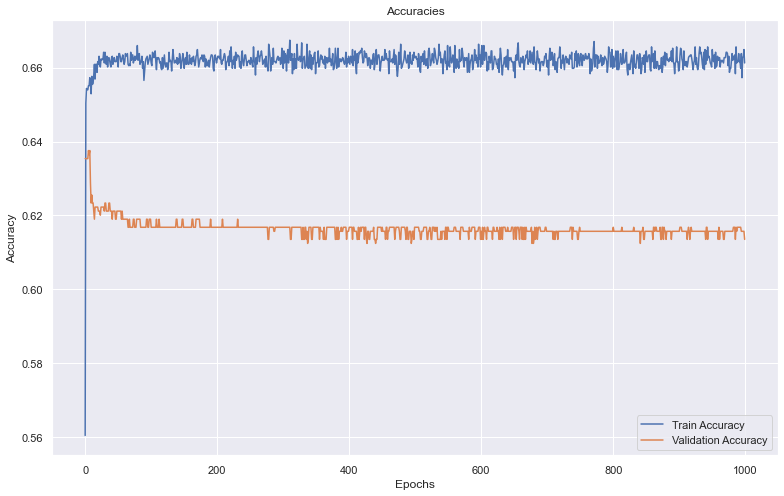

In [44]:
plt.figure(figsize = (13,8))
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## MODEL XGBOOST

In [45]:
X = data[['Glucose', 'BMI', 'Age','Pregnancies']]
y=data['Outcome']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [47]:
svc = SVC(kernel='poly',degree=2,gamma='auto')

In [48]:
y = y_train.values.ravel()
y_train = np.array(y).astype(int)

In [49]:
svc.fit(X_train,y_train)

SVC(degree=2, gamma='auto', kernel='poly')

In [50]:
tahmin = svc.predict(X_test)
tahmin2=accuracy_score(y_test,tahmin)
print("accuracy :",tahmin2)

accuracy : 0.7554585152838428


In [51]:
#accuracymean=cross_val_score(estimator=svc,X=X_train,y=y_train,cv=10)
#print(accuracymean.mean()*100)
#svmscor = round(accuracymean.mean()*100,4)


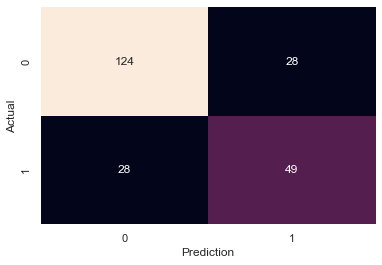

In [52]:
sns.heatmap(confusion_matrix(y_test,tahmin),annot=True,cbar=False,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Actual");

## Sonuçlar

In [53]:
liste=[]
liste.append(acc_gender)
liste.append(acc_gender_Ann)
liste.append(tahmin2)

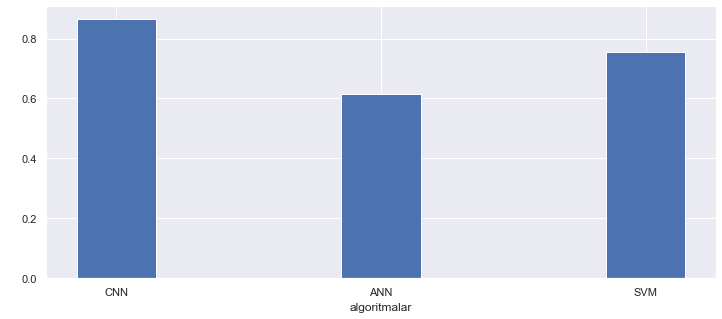

In [54]:
plt.figure(figsize=(12,5))
plt.bar(['CNN', 'ANN','SVM'],liste,width=0.3)
plt.xlabel('algoritmalar')
plt.ylabel(' ')
plt.show()
